In [13]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.optimize import minimize
import scipy.fft as fft

In [14]:
root_dir = r"D:\A-deng\\hunter_data\\0709\\calibration_block"
file_names = []

In [15]:
def list_dirs(root_dir):
    '''
    深度优先遍历文件夹，将文件夹下所有文件的路径存入file_names
    '''
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            file_names.append(os.path.join(root, file))

In [16]:
list_dirs(root_dir)
# file_names = file_names[0:1]

In [44]:
def read_data(file_names):
    '''
    传入所有数据文件，返回数据，数据形式[x, y, increment, data_size]
    '''
    datalist = []
    for file_name in file_names:
        if file_name.endswith('.csv'):
            print(f"Processing file: {file_name}")
            df = pd.read_csv(file_name)
            y = df['Math'].drop(df.index[0]).astype(float).to_numpy()
            x_start = df["Start"].iloc[0].astype(float)
            x_increment = df["Increment"].iloc[0].astype(float)
            data_size = len(y)
            x_end = x_start + x_increment * data_size
            x = np.arange(x_start, x_end, x_increment)
            
            datalist.append([x, y, x_increment, data_size])
            
    return datalist

In [45]:
data_list = read_data(file_names)

Processing file: D:\A-deng\\hunter_data\\0709\\calibration_block\empty\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_54304\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0709\\calibration_block\empty\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_54304\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0709\\calibration_block\left_270\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_54304\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0709\\calibration_block\left_270\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_54304\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0709\\calibration_block\left_90\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_54304\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0709\\calibration_block\left_90\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_54304\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0709\\calibration_block\right_270\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_54304\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0709\\calibration_block\right_270\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_54304\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0709\\calibration_block\right_90\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_54304\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0709\\calibration_block\right_90\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_54304\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [19]:
print(data_list)

[[array([-0.203    , -0.2029992, -0.2029984, ...,  2.3999976,  2.3999984,
        2.3999992]), array([ 0.000379,  0.000379,  0.000363, ..., -0.0117  , -0.00566 ,
       -0.00565 ]), 8e-07, 3000000], [array([-0.203    , -0.2029992, -0.2029984, ...,  2.3999976,  2.3999984,
        2.3999992]), array([-0.00522 ,  0.00082 ,  0.0068  , ...,  0.000789, -0.00525 ,
       -0.00519 ]), 8e-07, 3000000], [array([-0.203    , -0.2029992, -0.2029984, ...,  2.3999976,  2.3999984,
        2.3999992]), array([-0.374, -0.374, -0.374, ..., -0.356, -0.35 , -0.338]), 8e-07, 3000000], [array([-0.203    , -0.2029992, -0.2029984, ...,  2.3999976,  2.3999984,
        2.3999992]), array([-0.144, -0.144, -0.144, ..., -0.132, -0.132, -0.132]), 8e-07, 3000000], [array([-0.203    , -0.2029992, -0.2029984, ...,  2.3999976,  2.3999984,
        2.3999992]), array([-0.138, -0.138, -0.132, ..., -0.289, -0.277, -0.277]), 8e-07, 3000000], [array([-0.203    , -0.2029992, -0.2029984, ...,  2.3999976,  2.3999984,
        2.3

In [20]:
# FFT
def do_fft(y, increment, data_size):
    '''
    对y进行FFT变换，返回FFT结果和频率
    '''
    fft_result = fft.fft(y)
    fft_freq = fft.fftfreq(data_size, increment)
    return fft_result, fft_freq

In [21]:
fft_results = []
fft_freqs = []
params_b = []
fft_results_peaks=[]
phases = []
phase=None

for data in data_list:
    fft_result, fft_freq = do_fft(data[1], data[2], data[3])
    fft_results.append(fft_result)
    fft_freqs.append(fft_freq)

    # 寻找FFT结果中的峰值
    peaks, _ = find_peaks(np.abs(fft_result), height=data[3]*0.01)  # height是选中阈值

    # 获取峰值的频率和振幅
    peak_frequencies = fft_freq[peaks]
    peak_amplitudes = np.abs(fft_result[peaks])
    fft_results_peaks.append(fft_result[peaks])
    print(fft_result[peaks])
    angles = np.angle(fft_result[peaks])

    b = 0
    # 打印峰值信息
    for i, frequency in enumerate(peak_frequencies):
        if frequency > 0:
            print(f"峰值 {i + 1}: 频率 = {frequency} Hz, 振幅 = {peak_amplitudes[i]}, 相位 = {angles[i]}")

            if 2 * np.pi * frequency > b:
                b = 2 * np.pi * frequency
                phase = angles[i]
    
    params_b.append(b)
    phases.append(phase)

    # if phase is not None:  # 或者使用适当的条件判断
    #     phases.append(phase)
    # else:
    #     phases.append(None)  # 或者添加其他默认值

    # print(params_b)

[]
[]
[-545968.83431325+704683.50310624j -545968.83431325-704683.50310624j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 891437.4950558494, 相位 = 2.229963746378628
[-203217.00800697+236224.13201232j -203217.00800697-236224.13201232j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 311607.11302580975, 相位 = 2.2812236747210295
[-393904.93379854-796821.71132219j -393904.93379854+796821.71132219j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 888867.7834780966, 相位 = -2.0299098161905467
[-123355.31543435-285281.98351996j -123355.31543435+285281.98351996j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 310809.17613061453, 相位 = -1.9789162932048485
[601060.89442501+904223.80612053j 601060.89442501-904223.80612053j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 1085769.2620267363, 相位 = 0.984138602916097
[239482.58539367+394447.28071423j 239482.58539367-394447.28071423j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 461454.8363271163, 相位 = 1.0251473177008674
[814706.65773605+652010.21155103j 814706.65773605-652010.21155103j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 1043486.5855037447, 相位 = 0.6749241964646256
[339714.72812128+289465.38102191j 339

In [22]:
def ifft_filter(fft_result, fft_freq, desired_frequency, bandwidth):
    '''
    逆FFT滤波，传入参数为数据，采样频率(即1/increment)，数据长度，保留的频率，频率带宽，返回滤波后的数据
    '''

    # 应用滤波器
    fft_result_filtered = np.copy(fft_result)
    fft_result_filtered[(fft_freq > desired_frequency + bandwidth/2) | (fft_freq < desired_frequency - bandwidth/2)] = 0

    # 执行逆FFT
    filtered_signal = fft.ifft(fft_result_filtered)

    # 取实部，因为IFFT的结果可能包含复数
    return filtered_signal.real

In [23]:
def plot_ifft_figure(x, y, filtered_signal):
    '''
    绘制原始和滤波后的信号
    '''
    plt.figure(figsize=(10, 6))
    x_interval = 0.1
    
    plt.plot(x, y, label='source')
    plt.plot(x, filtered_signal, label='filtered red', color='red')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xticks(np.arange(min(x), max(x)+x_interval, x_interval))
    plt.show()

 \empty\1.csv : 



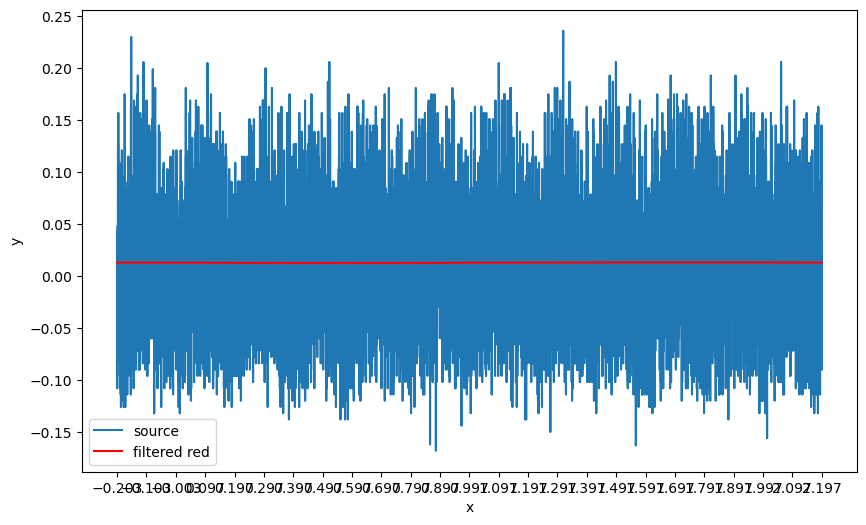

 \empty\2.csv : 



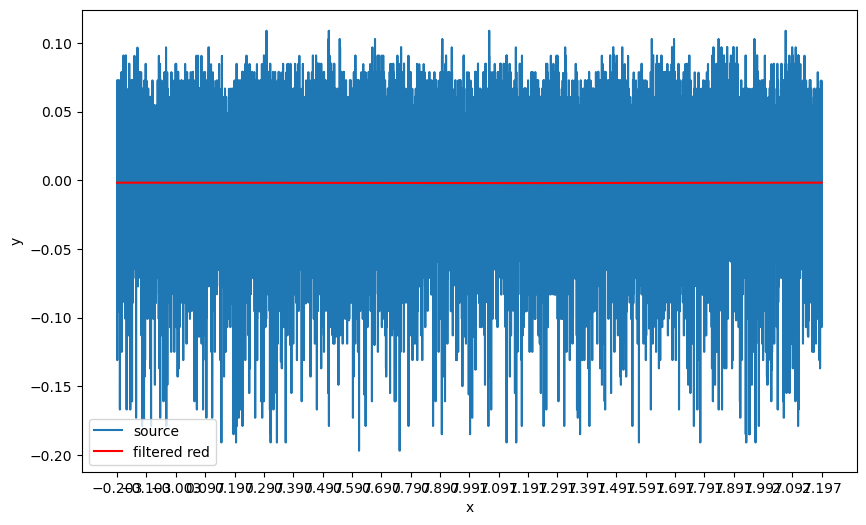

 \left_270\1.csv : 



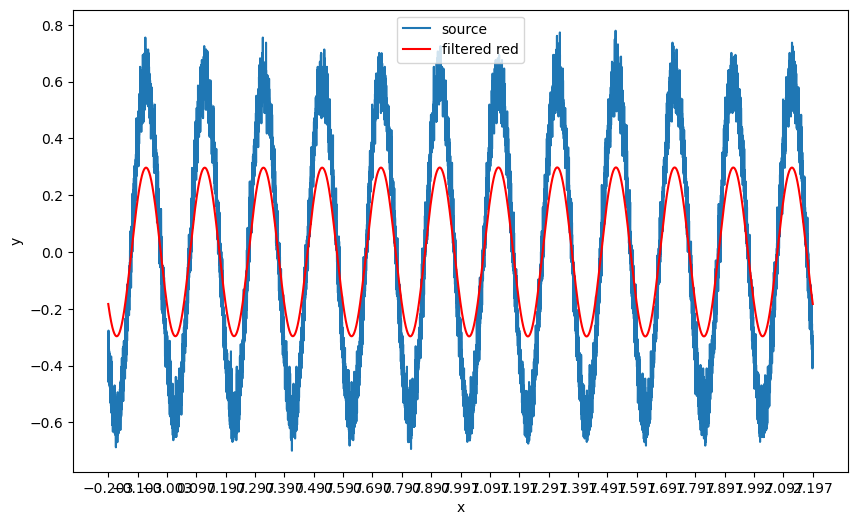

 \left_270\2.csv : 



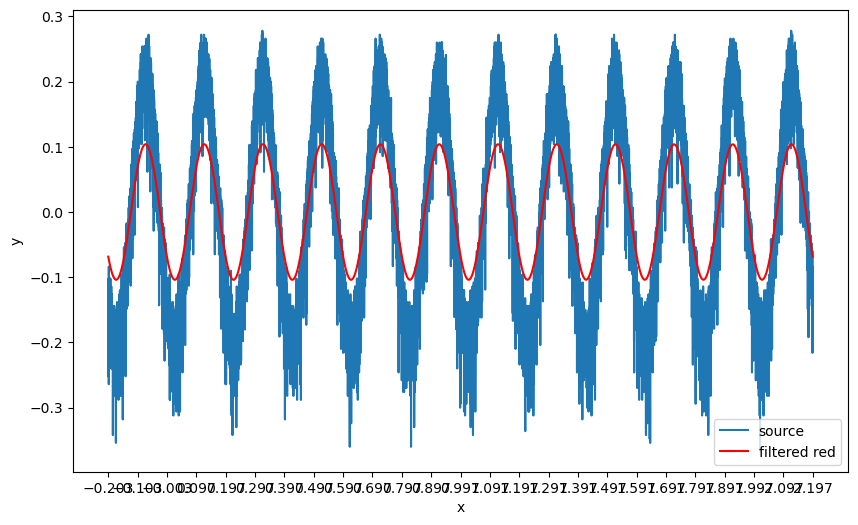

 \left_90\1.csv : 



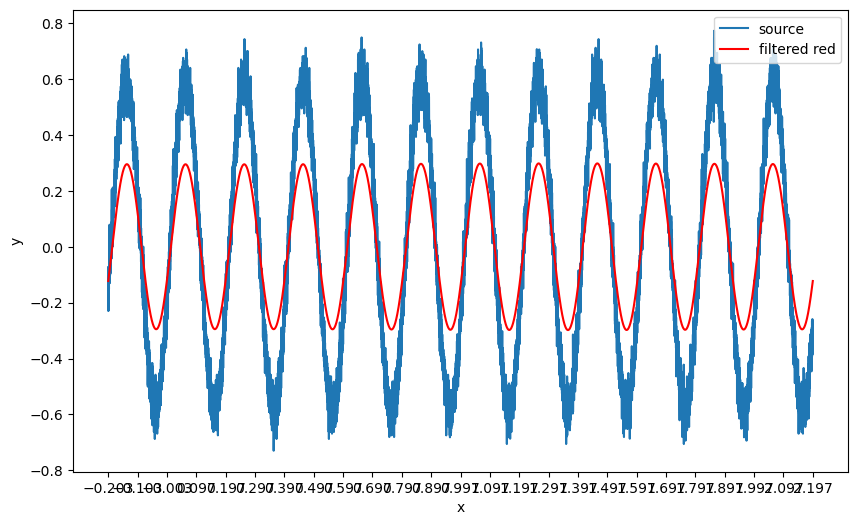

 \left_90\2.csv : 



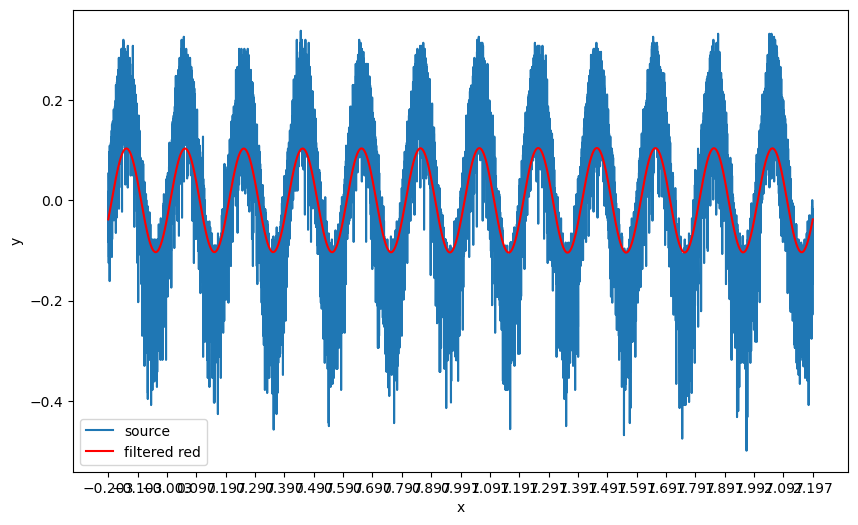

 \right_270\1.csv : 



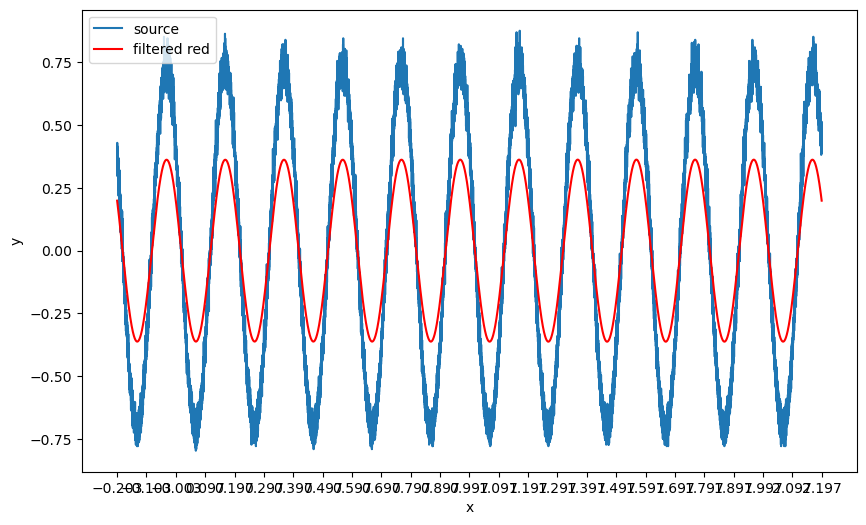

 \right_270\2.csv : 



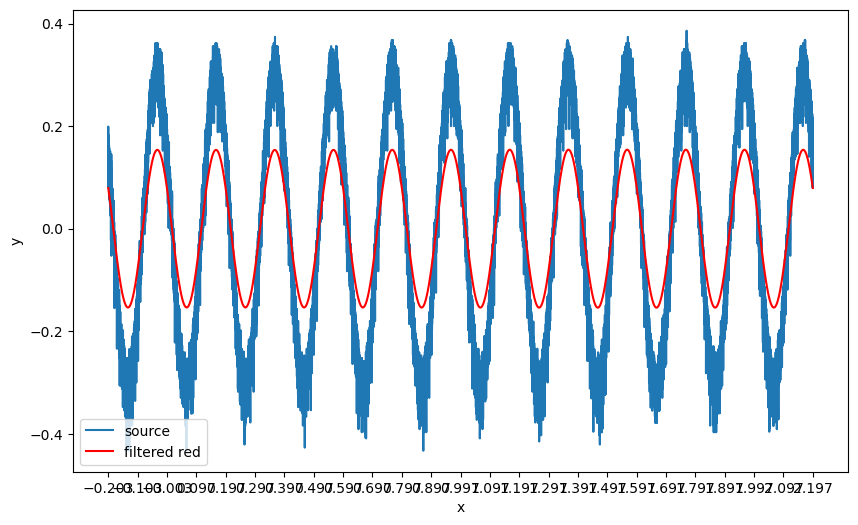

 \right_90\1.csv : 



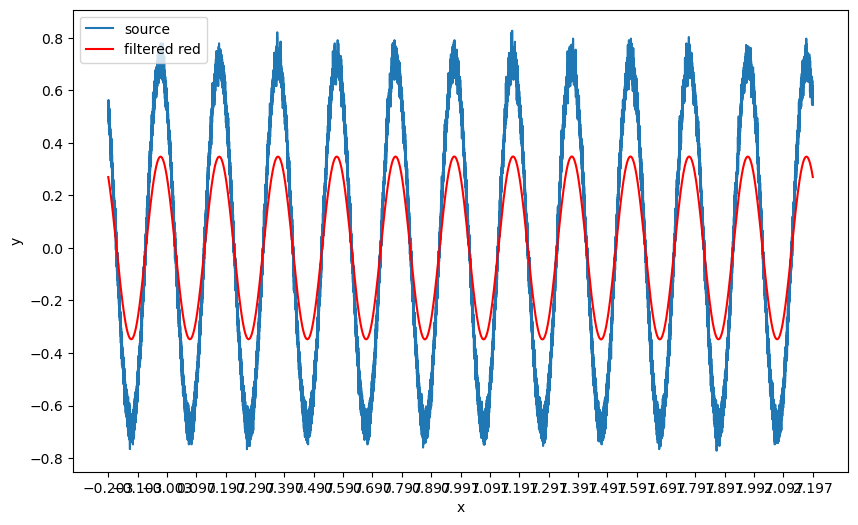

 \right_90\2.csv : 



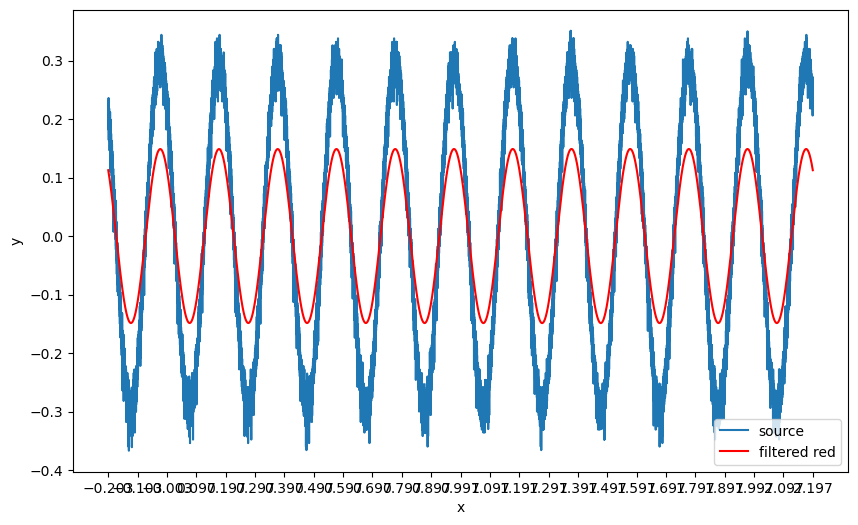

In [48]:
filtered_signals = []

for i in range(len(data_list)):
    filtered_signal = ifft_filter(fft_results[i], fft_freqs[i], params_b[i] / 2 / np.pi, 1)
    filtered_signals.append(filtered_signal)
    print(f" {file_names[i][len(root_dir):]} : \n")
    plot_ifft_figure(data_list[i][0], data_list[i][1], filtered_signal) 
# data_list.shape()
# type(data_list)
# len(data_list)

In [46]:
(data_list[i][0].shape, data_list[i][1].shape)

((3000000,), (3000000,))

In [49]:
def plot_curve(x, y, b, popt):
    # 模型函数f(x) = acos(bx+c)
    def func_model(x, a, c):
        return a * np.cos(b * x + c)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='source')
    plt.plot(x, func_model(x, *popt), label='fitting', color='red')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [50]:
# 计算滤波后逆FFT得到的a
ifft_fit_popts = []
for i in range(len(filtered_signals)):
    max_a = 0
    max_a_index = 0
    for j in range(len(filtered_signals[i])):
        temp_y = filtered_signals[i][j]
        if temp_y > max_a:
            max_a = temp_y
            max_a_index = j
    
    max_x = data_list[i][0][max_a_index]
    c = - max_x * params_b[i]     # 取最大值时 bx+c = 0

    ifft_fit_popts.append([max_a, c])

# print(params_b)

In [51]:
# 保存拟合结果
with open('test/fit_result_calibration_block.txt', 'w+', encoding="utf-8") as f:
    for i in range(len(filtered_signals)):
         f.write(f" {file_names[i][len(root_dir):]} : \n")
         f.write(f" fft + ifft fit : \n s = {ifft_fit_popts[i][0]} *cos( {params_b[i]} *x + {phases[i]} )\n\n\n")
        #  f.write(f"f = {ifft_fit_popts[i][0]} *cos( {params_b[i]} *x + {phases[i]} )\n")
        # f.write(f" fft + opt fit : \n f = {popts[i][0]} *sin( {params_b[i]} *x + {popts[i][1]} )\n\n")

In [52]:
T_list = []
for i in range(len(filtered_signals)):
  if i == 0:
    continue
  if i == 1:
    continue
# #   sensor1 和 sensor2对应时刻
#   if i % 2 == 1:
#     continue
  T = - phases[i] / 31.41592653589793 + 0.2*4
  T_list.append(T)
  # T_list.append(T)

for i in T_list:
  print(i)

0.729018049369624
0.7273863951739781
0.8646140362554973
0.8629908620057285
0.7686738953316703
0.7673685473981019
0.7785164955840659
0.7775367913154695


In [53]:

# T_list=[270,270,90,90,270,270,90,90]

t_values = []
T = 0.2

# # 0
# for i in range(len(T_list)):
#     if i == 0 or i == 1 or i == 4 or i == 5: # 270
#         maxT = T_list[i] - 3 * T / 4
#     if i == 2 or i == 3 or i == 6 or i == 7: # 90
#         maxT = T_list[i] - T / 4
#     t_values.append(maxT)

#270
for i in range(len(T_list)):
    if i == 0 or i == 1 or i == 4 or i == 5: # 270
        maxT = T_list[i]
    if i == 2 or i == 3 or i == 6 or i == 7: # 90
        maxT = T_list[i] - 2 * T / 3
    t_values.append(maxT)

for i in t_values:
  print(i)

0.729018049369624
0.7273863951739781
0.731280702922164
0.7296575286723952
0.7686738953316703
0.7673685473981019
0.6451831622507326
0.6442034579821362


In [54]:
import math
 #计算F的值
F_values=[]
Fu=[]
Fv=[]
m=0.27
r=0.08169
T = 0.2
# t_standard = 0.7370743034821594 #0度对应的最大值时刻
params_b_squared=(2 * np.pi * frequency)**2
positions=[270,270,90,90,270,270,90,90]

# #0
# Fu=[0,0,0,0]
# Fv=[0,0,0,0]

#270
Fu=[0,0,21.7687,-21.7687]
Fv=[21.7687,-21.7687,0,0]

print(F_values)
print("Fu:", Fu)
print("Fv:", Fv)

F = np.vstack((Fu, Fv))
print(F)

[]
Fu: [0, 0, 21.7687, -21.7687]
Fv: [21.7687, -21.7687, 0, 0]
[[  0.       0.      21.7687 -21.7687]
 [ 21.7687 -21.7687   0.       0.    ]]


In [55]:
#取t=1,计算Su\Sv
Su=[]
Sv=[]
S_values=[]
for i in range(len(t_values)):
  S_value = ifft_fit_popts[i+2][0]*np.cos(params_b[i+2] * t_values[i] +phases[i+2])
  S_values.append(S_value)

  if i % 2 == 0:
      Su.append(S_value)
  else:
        Sv.append(S_value)
# print(S_values)
print("Su:", Su)
print("Sv:", Sv)

S = np.vstack((Su, Sv))
print(S)

Su: [0.297619787245828, -0.14908093927723085, 0.3621813670857198, -0.17408801837354027]
Sv: [0.10392845264503627, -0.05211067752539824, 0.15404390272761934, -0.07442549195435154]
[[ 0.29761979 -0.14908094  0.36218137 -0.17408802]
 [ 0.10392845 -0.05211068  0.1540439  -0.07442549]]


In [56]:
def target_function(S, *parameters):
    A_11, A_12, A_21, A_22 = parameters
    A = np.array([[A_11, A_12], [A_21, A_22]])
    return np.dot(A, S).flatten()

In [57]:
def optimize_A(S_list, F_list):
 
    # S_flat = np.concatenate([S.flatten() for S in S_list])
    # F_flat = np.concatenate([F.flatten() for F in F_list])

    initial_guess_A = [2,2,2,2]

    optimized_A_flat, _ = curve_fit(target_function, S_list, F_list.flatten(), p0=initial_guess_A)

    optimized_A = optimized_A_flat.reshape((2, 2))

    return optimized_A

In [58]:
S_flat = np.concatenate([S.flatten() for S in S])
F_flat = np.concatenate([F.flatten() for F in F])
print(S.shape)
print(F.shape)

(2, 4)
(2, 4)


In [59]:
A_matrix = optimize_A(S, F)

# 输出结果
print("Optimized A matrix:")
print(A_matrix)
print("residual")
print(A_matrix.dot(S) - F) # AS

Optimized A matrix:
[[ -333.68872877   954.2469596 ]
 [  488.01446722 -1146.17693225]]
residual
[[-0.13895851  0.02017352  4.37138585  8.83961013]
 [ 4.35366688  8.74310135  0.18817903  0.34731051]]


In [60]:
'''
    coefficients是系数阵A
    residuals是残差项
    F = AS -> F' = S'A'
'''
# 使用numpy的lstsq函数进行最小二乘拟合
coefficients, residuals, rank, singular_values = np.linalg.lstsq(S.T, F.T, rcond=None)
A = coefficients.T
# print(F)    # F
# print(A.dot(S)) # AS
print(A.dot(S) - F) # AS

# print(np.dot(A,S))
# print(S)
print(A)

[[-0.13895837  0.02017345  4.37138573  8.8396102 ]
 [ 4.35366718  8.7431012   0.18817881  0.34731063]]
[[ -333.68872446   954.24694864]
 [  488.01447561 -1146.17695342]]
